In [17]:
import geopandas
import pandas as pd

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import shapely

In [25]:
pofw_gdf = geopandas.read_file('../input/data/geofabrik_pois/gis_osm_pofw_free_1.shp')
pofw_gdf['_src'] = 'pofw'

In [41]:
pofw_gdf.head(2)

,osm_id,code,fclass,name,geometry,_src
0,31556986,3300,muslim,None,POINT (39.25165 -5.99137),pofw
1,274949978,3500,hindu,Hindu Temple,POINT (39.10350 -5.07353),pofw


In [26]:
len(pofw_gdf)

2198

In [27]:
pois_gdf = geopandas.read_file('../input/data/geofabrik_pois/gis_osm_pois_free_1.shp')
pois_gdf['_src'] = 'pois'

In [40]:
pois_gdf.head(2)

,osm_id,code,fclass,name,geometry,_src
0,31553367,2301,restaurant,La Villa,POINT (39.37536 -5.97723),pois
1,31553369,2401,hotel,Blue Bay Beach Resort,POINT (39.37505 -5.97794),pois


In [28]:
len(pois_gdf)

69604

In [42]:
gdf = pd.concat([pois_gdf, pofw_gdf], ignore_index=True)

In [43]:
len(gdf)

71802

In [44]:
gdf

,osm_id,code,fclass,name,geometry,_src
0,31553367,2301,restaurant,La Villa,POINT (39.37536 -5.97723),pois
1,31553369,2401,hotel,Blue Bay Beach Resort,POINT (39.37505 -5.97794),pois
2,31553370,2401,hotel,La Villa,POINT (39.37511 -5.97730),pois
3,31553372,2401,hotel,Vera Club,POINT (39.37388 -5.97313),pois
4,31553373,2401,hotel,Kiwengwa Beach Club,POINT (39.37145 -5.96675),pois
...,...,...,...,...,...,...
71797,9513252219,3100,christian,Kanisa la Sabato,POINT (31.66627 -8.04219),pofw
71798,9513273357,3100,christian,Pentecoste Assemblies of God Tanzania - Nambogo,POINT (31.66067 -8.04458),pofw
71799,9687642250,3300,muslim,None,POINT (37.64724 -6.83568),pofw
71800,9731102420,3100,christian,Africa Inland Church Tanzania (AICT) Geita,POINT (32.22896 -2.87418),pofw


In [31]:
wkt = 'POLYGON ((34.47054862976074 -5.730179371102675, 34.52470779418945 -5.730179371102675, 34.52470779418945 -5.688757998098425, 34.47054862976074 -5.688757998098425, 34.47054862976074 -5.730179371102675))'
geometry = shapely.wkt.loads(wkt)

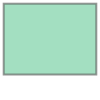

In [32]:
geometry

In [49]:
aoi_gdf = gdf[gdf.within(geometry)].reset_index(drop=True)

In [50]:
aoi_gdf

,osm_id,code,fclass,name,geometry,_src
0,5823614254,2401,hotel,Puma guesthouse,POINT (34.49700 -5.69803),pois
1,9360810597,2204,park,None,POINT (34.48656 -5.70005),pois
2,9387793336,2501,supermarket,Rahma Supermarket,POINT (34.49706 -5.69951),pois


<AxesSubplot:>

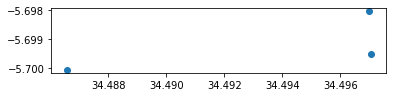

In [51]:
aoi_gdf.plot()

In [52]:
aoi_gdf.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"_src": "pois", "code": 2401, "fclass": "hotel", "name": "Puma guesthouse", "osm_id": "5823614254"}, "geometry": {"type": "Point", "coordinates": [34.4970034, -5.6980266]}}, {"id": "1", "type": "Feature", "properties": {"_src": "pois", "code": 2204, "fclass": "park", "name": null, "osm_id": "9360810597"}, "geometry": {"type": "Point", "coordinates": [34.4865562, -5.7000483]}}, {"id": "2", "type": "Feature", "properties": {"_src": "pois", "code": 2501, "fclass": "supermarket", "name": "Rahma Supermarket", "osm_id": "9387793336"}, "geometry": {"type": "Point", "coordinates": [34.4970601, -5.6995106]}}]}'